# Machine Learning for LAI Estimation
XGBoost are used in this repository.

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import pylab
from sklearn import metrics
from sklearn.model_selection import KFold
import xgboost
from sklearn.model_selection import train_test_split # Import train_test_split function
from matplotlib import pyplot
from pandas import read_csv
from sklearn.utils import resample
import plotly.express as px

In [2]:
# Call the function for goodness-of-fit
%run D:\Python_Functions\gfit.py

# XGBoost
## Parameters setting for XGBoost

In [3]:
# parameters for the model list here
learn_rate = [0.000001 * 10**i for i in range(7)]

n_iterations = 1000
train_percentage = 0.9
print(learn_rate)

[1e-06, 9.999999999999999e-06, 9.999999999999999e-05, 0.001, 0.01, 0.09999999999999999, 1.0]


## Read prepared EXCEL file that include the data for machine learning

In [4]:
df = pd.read_excel (r'Demo_LAI_AggieAir.xlsx','Sheet1')
print(df.head())

   mean_DSM_Z  mean_R  mean_G  mean_B  mean_NIR  mean_NDVI  mean_Tr  mean_SR  \
0        1237     697     638     388      3478       8414    30474     2195   
1        1142     716     632     379      3395       8356    30565     2138   
2        1269     817     703     429      3641       8238    30638     1945   
3         988     758     681     426      3540       8329    30611     2128   
4        1108     795     706     436      3656       8275    30587     1894   

   mean_NDWI  mean_GNDVI  ...  COVAR_IronOxide  COVAR_MSAVI  COVAR_MTVI2  \
0       1509        8491  ...             2915         1459            5   
1       1531        8469  ...             3320         1575            6   
2       1591        8409  ...             2216         1463            5   
3       1573        8427  ...             2521         1511            6   
4       1597        8403  ...             1959         1334            5   

   COVAR_NDWI  COVAR_PVI  COVAR_SAVI  COVAR_SR  COVAR_TSAVI  C

In [5]:
feature_cols = ['mean_DSM_Z','mean_R','mean_G','mean_B','mean_NIR','mean_NDVI','mean_Tr','mean_SR','mean_NDWI',
                'mean_GNDVI','mean_SAVI','mean_PVI','mean_EVI','mean_CIg','mean_MTVI2','mean_MSAVI','mean_TSAVI','mean_VARI','mean_IronOxide',
                'std_DSM_Z','std_R','std_G','std_B','std_NIR','std_NDVI','std_Tr','std_SR','std_NDWI',
                'std_GNDVI','std_SAVI','std_PVI','std_EVI','std_CIg','std_MTVI2','std_MSAVI','std_TSAVI','std_VARI','std_IronOxide',
                'min_DSM_Z','min_R','min_G','min_B','min_NIR','min_NDVI','min_Tr','min_SR','min_NDWI',
                'min_GNDVI','min_SAVI','min_PVI','min_EVI','min_CIg','min_MTVI2','min_MSAVI','min_TSAVI','min_VARI','min_IronOxide',
                '25_DSM_Z','25_R','25_G','25_B','25_NIR','25_NDVI','25_Tr','25_SR','25_NDWI',
                '25_GNDVI','25_SAVI','25_PVI','25_EVI','25_CIg','25_MTVI2','25_MSAVI','25_TSAVI','25_VARI','25_IronOxide',
                '50_DSM_Z','50_R','50_G','50_B','50_NIR','50_NDVI','50_Tr','50_SR','50_NDWI',
                '50_GNDVI','50_SAVI','50_PVI','50_EVI','50_CIg','50_MTVI2','50_MSAVI','50_TSAVI','50_VARI','50_IronOxide',
                '75_DSM_Z','75_R','75_G','75_B','75_NIR','75_NDVI','75_Tr','75_SR','75_NDWI',
                '75_GNDVI','75_SAVI','75_PVI','75_EVI','75_CIg','75_MTVI2','75_MSAVI','75_TSAVI','75_VARI','75_IronOxide',
                'max_DSM_Z','max_R','max_G','max_B','max_NIR','max_NDVI','max_Tr','max_SR','max_NDWI',
                'max_GNDVI','max_SAVI','max_PVI','max_EVI','max_CIg','max_MTVI2','max_MSAVI','max_TSAVI','max_VARI','max_IronOxide',
                'cc00','cc01','cc02','cc03','cc04','cc05','cc06','cc07','cc08','cc09','cc10','cc11','cc12','cc13',	
                'cc14','cc15','cc16','cc17','cc18','cc19','cc20','cc21','cc22','cc23','cc24','cc25','cc26','cc27','cc28','cc29','cc30',
                'VDR_DSM','VDR_R','VDR_G','VDR_B','VDR_NIR','VDR_NDVI','VDR_Tr','VDR_CIg','VDR_EVI','VDR_GNDVI',
                'VDR_IronOxide','VDR_MSAVI','VDR_MTVI2','VDR_NDWI','VDR_PVI','VDR_SAVI','VDR_SR','VDR_TSAVI','VDR_VARI',
                'COVAR_DSM','COVAR_R','COVAR_G','COVAR_B','COVAR_NIR','COVAR_NDVI','COVAR_Tr','COVAR_CIg','COVAR_EVI','COVAR_GNDVI',
                'COVAR_IronOxide','COVAR_MSAVI','COVAR_MTVI2','COVAR_NDWI','COVAR_PVI','COVAR_SAVI','COVAR_SR','COVAR_TSAVI','COVAR_VARI']

df_new = df[feature_cols]
X = df[feature_cols]
y = df.Avg_LAI
df_new = pd.concat([X,y], axis=1, ignore_index=True)
df_new = df_new.values
print("Shape of the dataframe is:",df_new.shape)
# print(type(df_new))

Shape of the dataframe is: (500, 203)


## 5 fold cross-validation generating

In [6]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
kf.get_n_splits(df_new)
# The shape of df
[size_arr,size_col] = df_new.shape
print("Row:",size_arr,"Column:",size_col)

Row: 500 Column: 203


## Create empty list to save all the modeled results for evaluation
### 1st round to do the cross validation

In [7]:
[Trees,MAE_train,RMSE_train,RRMSE_train,R_Square_train,NASH_train,
 MAE_test,RMSE_test,RRMSE_test,R_Square_test,NASH_test] = [[],[],[],[],[],
                                                           [],[],[],[],[],[]]


When learning rate is 1e-06 :


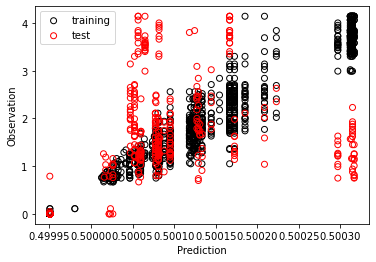

Results training:
NSE: -0.4122 MAE: 1.0964 RMSE: 1.3937 RRMSE: 111.21 % R2: 0.9610
Results test:
NSE: -0.4123 MAE: 1.0964 RMSE: 1.3938 RRMSE: 111.22 % R2: 0.3027

When learning rate is 9.999999999999999e-06 :


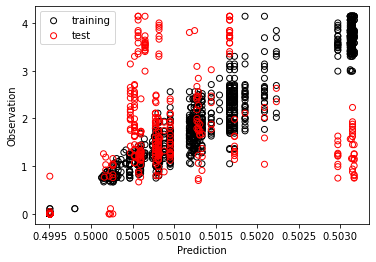

Results training:
NSE: -0.4098 MAE: 1.0954 RMSE: 1.3925 RRMSE: 111.12 % R2: 0.9610
Results test:
NSE: -0.4109 MAE: 1.0956 RMSE: 1.3931 RRMSE: 111.16 % R2: 0.3027

When learning rate is 9.999999999999999e-05 :


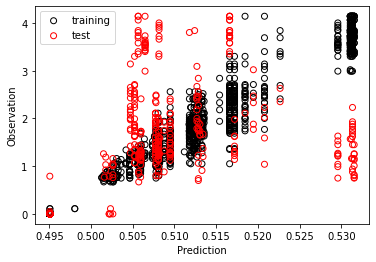

Results training:
NSE: -0.3860 MAE: 1.0859 RMSE: 1.3808 RRMSE: 110.18 % R2: 0.9619
Results test:
NSE: -0.3970 MAE: 1.0876 RMSE: 1.3862 RRMSE: 110.61 % R2: 0.3043

When learning rate is 0.001 :


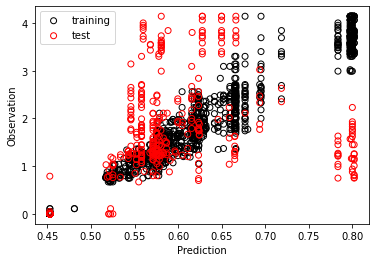

Results training:
NSE: -0.1700 MAE: 0.9955 RMSE: 1.2686 RRMSE: 101.23 % R2: 0.9670
Results test:
NSE: -0.2649 MAE: 1.0105 RMSE: 1.3191 RRMSE: 105.26 % R2: 0.3462

When learning rate is 0.01 :


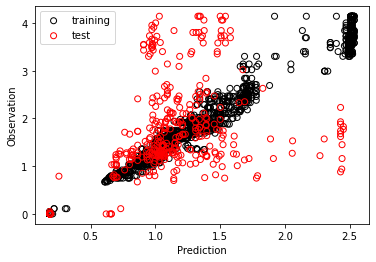

Results training:
NSE: 0.7776 MAE: 0.4187 RMSE: 0.5530 RRMSE: 44.13 % R2: 0.9840
Results test:
NSE: 0.3203 MAE: 0.6358 RMSE: 0.9669 RRMSE: 77.16 % R2: 0.4745

When learning rate is 0.09999999999999999 :


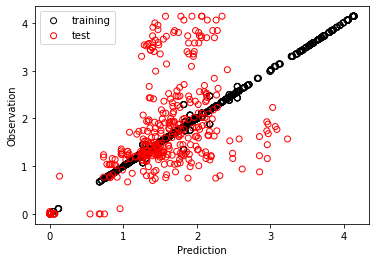

Results training:
NSE: 0.9987 MAE: 0.0104 RMSE: 0.0418 RRMSE: 3.34 % R2: 0.9987
Results test:
NSE: 0.5583 MAE: 0.4530 RMSE: 0.7795 RRMSE: 62.20 % R2: 0.5751

When learning rate is 1.0 :


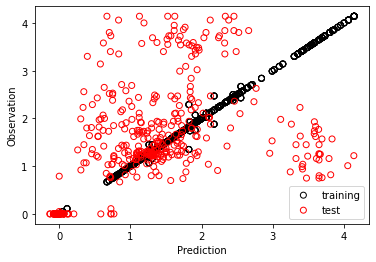

Results training:
NSE: 0.9987 MAE: 0.0079 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.2049 MAE: 0.6382 RMSE: 1.0458 RRMSE: 83.45 % R2: 0.3251


In [8]:
for estimator in learn_rate:
    print("\nWhen learning rate is",estimator,":")
    T_train_pred = []
    T_train_label = []
    T_test_pred = []
    T_test_label = []
    for train_index, test_index in kf.split(df_new):
        tmp_train_x = df_new[train_index,0:size_col-1]
        tmp_train_y = df_new[train_index,size_col-1]
        tmp_test_x = df_new[test_index,0:size_col-1]
        
        model = xgboost.XGBRegressor(learning_rate=estimator)
        model.fit(tmp_train_x, tmp_train_y)
        train_pred = model.predict(tmp_train_x)
        test_pred = model.predict(tmp_test_x)
    
        for itouch in range(len(train_pred)):
            T_train_pred.append(train_pred[itouch])
            T_train_label.append(df_new[train_index,size_col-1][itouch])
        for itouch in range(len(test_pred)):
            T_test_pred.append(test_pred[itouch])
            T_test_label.append(df_new[test_index,size_col-1][itouch])

#     T_train_pred = [0 if i < 0 else i for i in T_train_pred]
#     T_test_pred = [0 if i < 0 else i for i in T_test_pred]
    plt.scatter(T_train_pred, T_train_label, facecolor="none", edgecolor="black", label="training")
    plt.scatter(T_test_pred, T_test_label, facecolor="none", edgecolor="red", label="test")
    plt.legend(loc="best")
    plt.xlabel('Prediction')
    plt.ylabel('Observation')
    plt.show()
            
    # Cross Validation results
    T_train_pred = np.asarray(T_train_pred)
    T_train_label = np.asarray(T_train_label)
    T_test_pred = np.asarray(T_test_pred)
    T_test_label = np.asarray(T_test_label)

    print("Results training:")
    R2_tr = gfit(T_train_label, T_train_pred, '5', residual='No')
    MAE_tr = gfit(T_train_label, T_train_pred, '3', residual='No')
    RMSE_tr = gfit(T_train_label, T_train_pred, '1', residual='No')
    RRMSE_tr = gfit(T_train_label, T_train_pred, '2', residual='No')
    NSE_tr = gfit(T_train_label, T_train_pred, '6', residual='No')
    print(("NSE: {:.4f}".format(NSE_tr)),"MAE: {:.4f}".format(MAE_tr),"RMSE: {:.4f}".format(RMSE_tr),"RRMSE: {:.2f}".format(RRMSE_tr), "%","R2: {:.4f}".format(R2_tr))
  
    print("Results test:")
    R2_te = gfit(T_test_label, T_test_pred, '5', residual='No')
    MAE_te = gfit(T_test_label, T_test_pred, '3', residual='No')
    RMSE_te = gfit(T_test_label, T_test_pred, '1', residual='No')
    RRMSE_te = gfit(T_test_label, T_test_pred, '2', residual='No')
    NSE_te = gfit(T_test_label, T_test_pred, '6', residual='No')
    print(("NSE: {:.4f}".format(NSE_te)),"MAE: {:.4f}".format(MAE_te),"RMSE: {:.4f}".format(RMSE_te),"RRMSE: {:.2f}".format(RRMSE_te), "%","R2: {:.4f}".format(R2_te))

    # Append the results
    Trees.append(estimator)
    R_Square_train.append(R2_tr)
    NASH_train.append(NSE_tr)
    RMSE_train.append(RMSE_tr)
    MAE_train.append(MAE_tr)
    RRMSE_train.append(RRMSE_tr)

    R_Square_test.append(R2_te)
    NASH_test.append(NSE_te)
    RMSE_test.append(RMSE_te)
    MAE_test.append(MAE_te)
    RRMSE_test.append(RRMSE_te)

### 2nd round to do the cross validation

In [9]:
# parameters for the model list here
learn_rate = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,
              0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
print(learn_rate)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


In [10]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
kf.get_n_splits(df_new)
# The shape of df
[size_arr,size_col] = df_new.shape
print("Row:",size_arr,"Column:",size_col)

Row: 500 Column: 203


In [11]:
[Trees,MAE_train,RMSE_train,RRMSE_train,R_Square_train,NASH_train,
 MAE_test,RMSE_test,RRMSE_test,R_Square_test,NASH_test] = [[],[],[],[],[],
                                                           [],[],[],[],[],[]]


When learning rate is 0.01 :


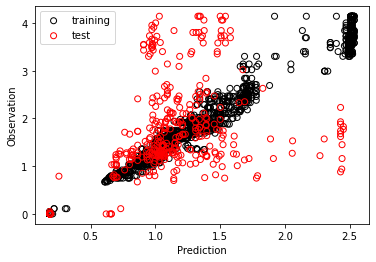

Results training:
NSE: 0.7776 MAE: 0.4187 RMSE: 0.5530 RRMSE: 44.13 % R2: 0.9840
Results test:
NSE: 0.3203 MAE: 0.6358 RMSE: 0.9669 RRMSE: 77.16 % R2: 0.4745

When learning rate is 0.02 :


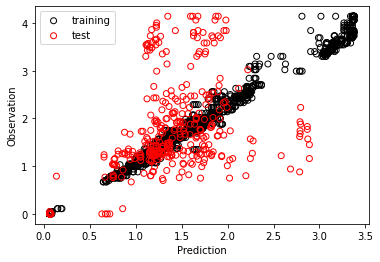

Results training:
NSE: 0.9600 MAE: 0.1653 RMSE: 0.2346 RRMSE: 18.72 % R2: 0.9922
Results test:
NSE: 0.4753 MAE: 0.5134 RMSE: 0.8496 RRMSE: 67.79 % R2: 0.5288

When learning rate is 0.03 :


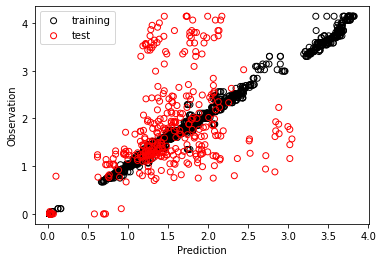

Results training:
NSE: 0.9906 MAE: 0.0722 RMSE: 0.1136 RRMSE: 9.07 % R2: 0.9960
Results test:
NSE: 0.5195 MAE: 0.4798 RMSE: 0.8130 RRMSE: 64.87 % R2: 0.5496

When learning rate is 0.04 :


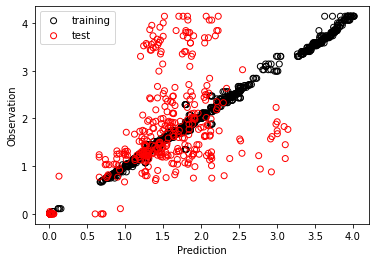

Results training:
NSE: 0.9967 MAE: 0.0376 RMSE: 0.0676 RRMSE: 5.39 % R2: 0.9976
Results test:
NSE: 0.5360 MAE: 0.4652 RMSE: 0.7989 RRMSE: 63.75 % R2: 0.5576

When learning rate is 0.05 :


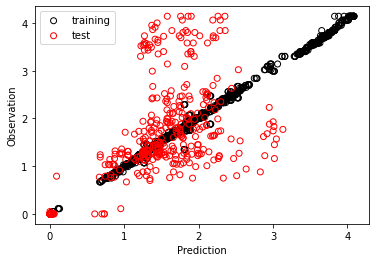

Results training:
NSE: 0.9981 MAE: 0.0244 RMSE: 0.0517 RRMSE: 4.12 % R2: 0.9982
Results test:
NSE: 0.5435 MAE: 0.4598 RMSE: 0.7924 RRMSE: 63.23 % R2: 0.5615

When learning rate is 0.06 :


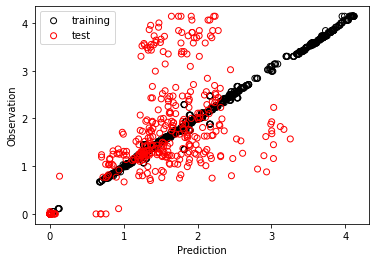

Results training:
NSE: 0.9985 MAE: 0.0180 RMSE: 0.0455 RRMSE: 3.63 % R2: 0.9985
Results test:
NSE: 0.5446 MAE: 0.4606 RMSE: 0.7914 RRMSE: 63.16 % R2: 0.5617

When learning rate is 0.07 :


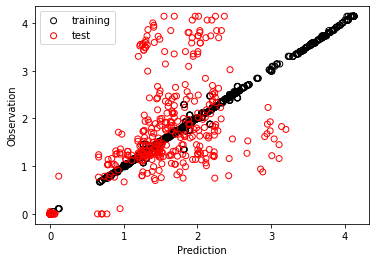

Results training:
NSE: 0.9986 MAE: 0.0146 RMSE: 0.0433 RRMSE: 3.46 % R2: 0.9986
Results test:
NSE: 0.5398 MAE: 0.4667 RMSE: 0.7956 RRMSE: 63.49 % R2: 0.5563

When learning rate is 0.08 :


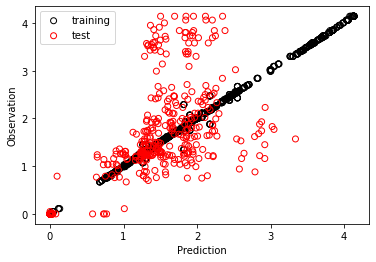

Results training:
NSE: 0.9987 MAE: 0.0128 RMSE: 0.0425 RRMSE: 3.39 % R2: 0.9987
Results test:
NSE: 0.5635 MAE: 0.4498 RMSE: 0.7749 RRMSE: 61.83 % R2: 0.5830

When learning rate is 0.09 :


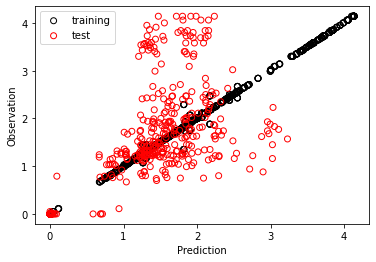

Results training:
NSE: 0.9987 MAE: 0.0113 RMSE: 0.0420 RRMSE: 3.35 % R2: 0.9987
Results test:
NSE: 0.5387 MAE: 0.4625 RMSE: 0.7966 RRMSE: 63.56 % R2: 0.5588

When learning rate is 0.1 :


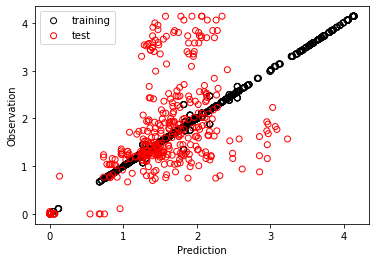

Results training:
NSE: 0.9987 MAE: 0.0104 RMSE: 0.0418 RRMSE: 3.34 % R2: 0.9987
Results test:
NSE: 0.5583 MAE: 0.4530 RMSE: 0.7795 RRMSE: 62.20 % R2: 0.5751

When learning rate is 0.2 :


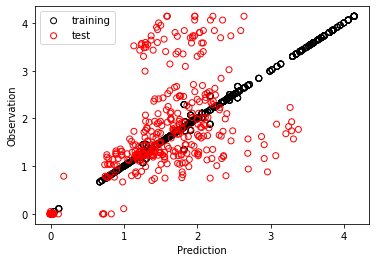

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.5515 MAE: 0.4570 RMSE: 0.7855 RRMSE: 62.68 % R2: 0.5664

When learning rate is 0.3 :


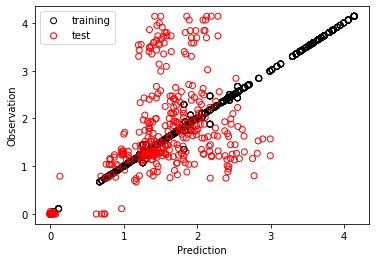

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.5161 MAE: 0.4801 RMSE: 0.8158 RRMSE: 65.10 % R2: 0.5323

When learning rate is 0.4 :


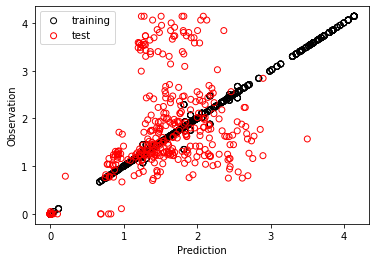

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.4886 MAE: 0.4878 RMSE: 0.8387 RRMSE: 66.93 % R2: 0.5067

When learning rate is 0.5 :


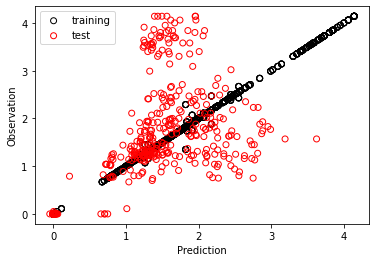

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.4696 MAE: 0.5018 RMSE: 0.8542 RRMSE: 68.16 % R2: 0.4918

When learning rate is 0.6 :


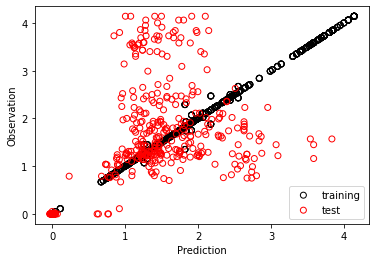

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.3611 MAE: 0.5550 RMSE: 0.9374 RRMSE: 74.80 % R2: 0.4008

When learning rate is 0.7 :


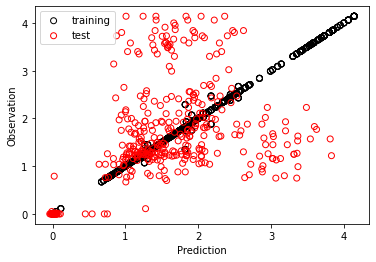

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.3807 MAE: 0.5565 RMSE: 0.9229 RRMSE: 73.65 % R2: 0.4233

When learning rate is 0.8 :


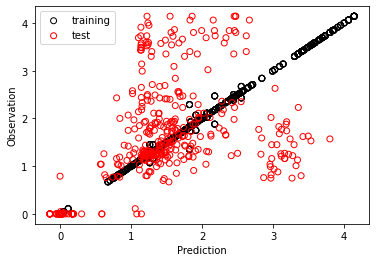

Results training:
NSE: 0.9987 MAE: 0.0080 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.3710 MAE: 0.5600 RMSE: 0.9301 RRMSE: 74.22 % R2: 0.4154

When learning rate is 0.9 :


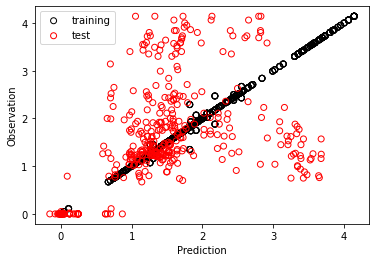

Results training:
NSE: 0.9987 MAE: 0.0079 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.3389 MAE: 0.5774 RMSE: 0.9536 RRMSE: 76.09 % R2: 0.3967

When learning rate is 1 :


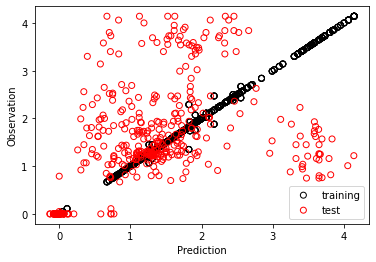

Results training:
NSE: 0.9987 MAE: 0.0079 RMSE: 0.0415 RRMSE: 3.32 % R2: 0.9987
Results test:
NSE: 0.2049 MAE: 0.6382 RMSE: 1.0458 RRMSE: 83.45 % R2: 0.3251


In [12]:
for estimator in learn_rate:
    print("\nWhen learning rate is",estimator,":")
    T_train_pred = []
    T_train_label = []
    T_test_pred = []
    T_test_label = []
    for train_index, test_index in kf.split(df_new):
        tmp_train_x = df_new[train_index,0:size_col-1]
        tmp_train_y = df_new[train_index,size_col-1]
        tmp_test_x = df_new[test_index,0:size_col-1]
        
        model = xgboost.XGBRegressor(learning_rate=estimator)
        model.fit(tmp_train_x, tmp_train_y)
        train_pred = model.predict(tmp_train_x)
        test_pred = model.predict(tmp_test_x)
    
        for itouch in range(len(train_pred)):
            T_train_pred.append(train_pred[itouch])
            T_train_label.append(df_new[train_index,size_col-1][itouch])
        for itouch in range(len(test_pred)):
            T_test_pred.append(test_pred[itouch])
            T_test_label.append(df_new[test_index,size_col-1][itouch])

#     T_train_pred = [0 if i < 0 else i for i in T_train_pred]
#     T_test_pred = [0 if i < 0 else i for i in T_test_pred]
    plt.scatter(T_train_pred, T_train_label, facecolor="none", edgecolor="black", label="training")
    plt.scatter(T_test_pred, T_test_label, facecolor="none", edgecolor="red", label="test")
    plt.legend(loc="best")
    plt.xlabel('Prediction')
    plt.ylabel('Observation')
    plt.show()
            
    # Cross Validation results
    T_train_pred = np.asarray(T_train_pred)
    T_train_label = np.asarray(T_train_label)
    T_test_pred = np.asarray(T_test_pred)
    T_test_label = np.asarray(T_test_label)

    print("Results training:")
    R2_tr = gfit(T_train_label, T_train_pred, '5', residual='No')
    MAE_tr = gfit(T_train_label, T_train_pred, '3', residual='No')
    RMSE_tr = gfit(T_train_label, T_train_pred, '1', residual='No')
    RRMSE_tr = gfit(T_train_label, T_train_pred, '2', residual='No')
    NSE_tr = gfit(T_train_label, T_train_pred, '6', residual='No')
    print(("NSE: {:.4f}".format(NSE_tr)),"MAE: {:.4f}".format(MAE_tr),"RMSE: {:.4f}".format(RMSE_tr),"RRMSE: {:.2f}".format(RRMSE_tr), "%","R2: {:.4f}".format(R2_tr))
  
    print("Results test:")
    R2_te = gfit(T_test_label, T_test_pred, '5', residual='No')
    MAE_te = gfit(T_test_label, T_test_pred, '3', residual='No')
    RMSE_te = gfit(T_test_label, T_test_pred, '1', residual='No')
    RRMSE_te = gfit(T_test_label, T_test_pred, '2', residual='No')
    NSE_te = gfit(T_test_label, T_test_pred, '6', residual='No')
    print(("NSE: {:.4f}".format(NSE_te)),"MAE: {:.4f}".format(MAE_te),"RMSE: {:.4f}".format(RMSE_te),"RRMSE: {:.2f}".format(RRMSE_te), "%","R2: {:.4f}".format(R2_te))

    # Append the results
    Trees.append(estimator)
    R_Square_train.append(R2_tr)
    NASH_train.append(NSE_tr)
    RMSE_train.append(RMSE_tr)
    MAE_train.append(MAE_tr)
    RRMSE_train.append(RRMSE_tr)

    R_Square_test.append(R2_te)
    NASH_test.append(NSE_te)
    RMSE_test.append(RMSE_te)
    MAE_test.append(MAE_te)
    RRMSE_test.append(RRMSE_te)

## Putting all the results in one table and you can save the table as a CSV file

In [13]:
pd_statistic = pd.DataFrame(
    {'Trees': Trees,
     'R2': R_Square_test,
     'NASH': NASH_test,'MAE': MAE_test,'RMSE': RMSE_test,'RRMSE': RRMSE_test})
print("Statistics to show the performance (examples):")
print(pd_statistic.head(19))
# Optional to save the results
# pd_statistic.to_csv('statistics7.csv')

Statistics to show the performance (examples):
    Trees        R2      NASH       MAE      RMSE      RRMSE
0    0.01  0.474471  0.320334  0.635818  0.966893  77.155154
1    0.02  0.528761  0.475287  0.513362  0.849555  67.791953
2    0.03  0.549564  0.519524  0.479776  0.812955  64.871340
3    0.04  0.557567  0.535950  0.465210  0.798938  63.752849
4    0.05  0.561486  0.543522  0.459840  0.792393  63.230576
5    0.06  0.561689  0.544610  0.460610  0.791448  63.155195
6    0.07  0.556293  0.539840  0.466692  0.795582  63.485059
7    0.08  0.582983  0.563451  0.449776  0.774903  61.834910
8    0.09  0.558816  0.538715  0.462537  0.796554  63.562634
9    0.10  0.575125  0.558304  0.453029  0.779458  62.198385
10   0.20  0.566359  0.551475  0.456967  0.785460  62.677324
11   0.30  0.532268  0.516114  0.480141  0.815835  65.101178
12   0.40  0.506667  0.488571  0.487755  0.838732  66.928305
13   0.50  0.491757  0.469553  0.501847  0.854185  68.161384
14   0.60  0.400767  0.361118  0.55500

## Results visualization
This is a "homework" for you: how can we plot the results to make the results more straight forward.<br>
Why we keep this empty for you?
- It's time to show your characteristics: there are many ways to plot the results in python, and the plot can be used for your research presentation.
- Plotting figures in python may require different libraries. Different issues may happen on different computers. This may bother this class. 

In [14]:
# You can plot your figures here


## Rerun the RF model based on the optimal parameter

In [15]:
learn_rate = 0.08
print("Optimal learning rate is:",learn_rate)

Optimal learning rate is: 0.08


Size of the dataset is: (500, 202) (500,)
Train dataset: (400, 203) 
Test dataset: (100, 203)
The optimal number of learning rate is 0.08 

Training:


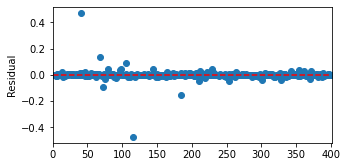

NASH: 0.9990 MAE: 0.0091 RMSE: 0.0368 RRMSE: 2.97 % R2: 0.9990
Test:


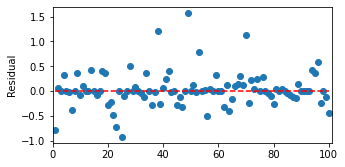

NASH: 0.9206 MAE: 0.2089 RMSE: 0.3500 RRMSE: 26.62 % R2: 0.9240

Trendline is: 
y=1.0557x+(-0.0371)


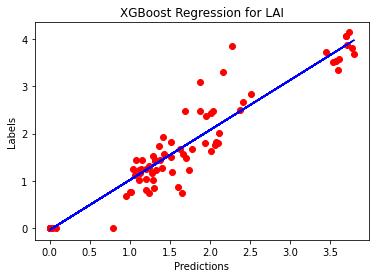

In [16]:
print("Size of the dataset is:", X.shape, y.shape)
# plot the sample dataset first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train = pd.concat([X_train,y_train], axis=1, ignore_index=True)
test = pd.concat([X_test,y_test], axis=1, ignore_index=True)
print("Train dataset:",train.shape,"\nTest dataset:",test.shape)

model = xgboost.XGBRegressor(learning_rate=learn_rate)
model.fit(X_train,y_train)
train_XGB_pred = model.predict(X_train)
test_XGB_pred = model.predict(X_test)
train_XGB_pred = [0 if i < 0 else i for i in train_XGB_pred]
test_XGB_pred = [0 if i < 0 else i for i in test_XGB_pred]
train_XGB_pred = np.asarray(train_XGB_pred)
test_XGB_pred = np.asarray(test_XGB_pred)

# Four parameters to show the performance of the prediction
print("The optimal number of learning rate is",learn_rate,"\n\nTraining:")
tmp_NASH = gfit(y_train, train_XGB_pred, '6', residual='Yes')
tmp_MAE = gfit(y_train, train_XGB_pred, '3', residual='No')
tmp_RMSE = gfit(y_train, train_XGB_pred, '1', residual='No')
tmp_RRMSE = gfit(y_train, train_XGB_pred, '2', residual='No')
tmp_R2 = gfit(y_train, train_XGB_pred, '5', residual='No')
print("NASH: {:.4f}".format(tmp_NASH),"MAE: {:.4f}".format(tmp_MAE),
      "RMSE: {:.4f}".format(tmp_RMSE),
      "RRMSE: {:.2f}".format(tmp_RRMSE),"%",
      "R2: {:.4f}".format(tmp_R2))
print("Test:")
tmp_NASH = gfit(y_test,test_XGB_pred, '6', residual='Yes')
tmp_MAE = gfit(y_test,test_XGB_pred, '3', residual='No')
tmp_RMSE = gfit(y_test,test_XGB_pred, '1', residual='No')
tmp_RRMSE = gfit(y_test,test_XGB_pred, '2', residual='No')
tmp_R2 = gfit(y_test,test_XGB_pred, '5', residual='No')
print("NASH: {:.4f}".format(tmp_NASH),"MAE: {:.4f}".format(tmp_MAE),
      "RMSE: {:.4f}".format(tmp_RMSE),
      "RRMSE: {:.2f}".format(tmp_RRMSE),"%",
      "R2: {:.4f}".format(tmp_R2))
# Plot the predictions vs. labels
plt.figure
plt.plot(test_XGB_pred,y_test,'ro')
plt.title('XGBoost Regression for LAI') 
plt.xlabel('Predictions') 
plt.ylabel('Labels') 
# calc the trendline
z = np.polyfit(test_XGB_pred, y_test, 1)
p = np.poly1d(z)
pylab.plot(test_XGB_pred,p(test_XGB_pred),"b--")
# the line equation:
print('\nTrendline is: ')
print ("y=%.4fx+(%.4f)"%(z[0],z[1]))
plt.show()

## Bootstrap
Using bootstrap strategy to show the confidence intervals for those statistics


Bootstraping:
400 records in the train dataset.
Checking information:
The shape of new train dataset for bootstrap in 1 round is (400, 203)
The shape of new train dataset for bootstrap in 2 round is (400, 203)
The shape of new train dataset for bootstrap in 3 round is (400, 203)
The shape of new train dataset for bootstrap in 4 round is (400, 203)
The shape of new train dataset for bootstrap in 5 round is (400, 203)
The shape of new train dataset for bootstrap in 6 round is (400, 203)
The shape of new train dataset for bootstrap in 7 round is (400, 203)
The shape of new train dataset for bootstrap in 8 round is (400, 203)
The shape of new train dataset for bootstrap in 9 round is (400, 203)
The shape of new train dataset for bootstrap in 10 round is (400, 203)
The shape of new train dataset for bootstrap in 11 round is (400, 203)
The shape of new train dataset for bootstrap in 12 round is (400, 203)
The shape of new train dataset for bootstrap in 13 round is (400, 203)
The shape of ne

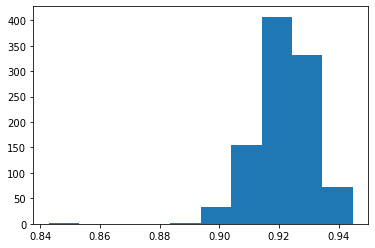

95.0% confidence interval for NSE 0.9020 and 0.9387


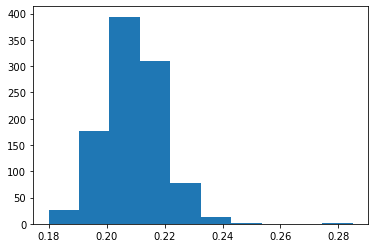

95.0% confidence interval for MAE 0.1898 and 0.2302


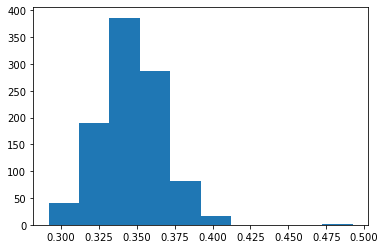

95.0% confidence interval for RMSE 0.3077 and 0.3889


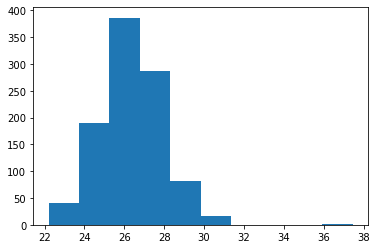

95.0% confidence interval for RRMSE 23.40% and 29.57%


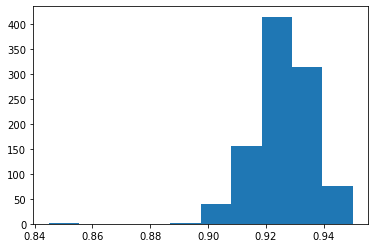

95.0% confidence interval for R2 0.9054 and 0.9428
Based on the bootstrap we can extract the median values for each statistics:
Nash median: 0.9222 
MAE median: 0.2089 
RMSE median: 0.3465 
RRMSE median: 26.35 % 
R2 median: 0.9263
These values will be used as the standard to choose the as less input variables as we need to predict the LAI.


In [18]:
# Bootstraping second
print("\nBootstraping:")
test_bootstrap = test.values

# configure bootstrap
size_train = len(train)
print(size_train,"records in the train dataset.")

# run bootstrap
stats_NSE = list()
stats_MAE = list()
stats_RMSE = list()
stats_RRMSE = list()
stats_R2 = list()
print("Checking information:")
for i in range(n_iterations):
    # prepare train dataset
    train_bo_1 = train.sample(frac=train_percentage)
    size_train_bo_1 = len(train_bo_1)
    # print(train_bo_1.shape,size_train_bo_1)
    size_train_bo_2 = size_train - size_train_bo_1
    # print(size_train_bo_2)
    train_bo_2 = train_bo_1.sample(n=size_train_bo_2)
    # print(train_bo_2.shape)
    train_bootstrap = pd.concat([train_bo_1,train_bo_2], axis=0, ignore_index=True)
    train_bootstrap = train_bootstrap.values
    print("The shape of new train dataset for bootstrap in",i+1,"round is",train_bootstrap.shape)
 
    # fit model
    model.fit(train_bootstrap[:,:-1], train_bootstrap[:,-1])
    # evaluate model
    predictions = model.predict(test_bootstrap[:,:-1])
    predictions = [0 if i < 0 else i for i in predictions]
    predictions = np.asarray(predictions)
    score_NSE = gfit(test_bootstrap[:,-1], predictions, '6', residual='No')
    score_MAE = gfit(test_bootstrap[:,-1], predictions, '3', residual='No')
    score_RMSE = gfit(test_bootstrap[:,-1], predictions, '1', residual='No')
    score_RRMSE = gfit(test_bootstrap[:,-1], predictions, '2', residual='No')
    score_R2 = gfit(test_bootstrap[:,-1], predictions, '5', residual='No')

    stats_NSE.append(score_NSE)
    stats_MAE.append(score_MAE)
    stats_RMSE.append(score_RMSE)
    stats_RRMSE.append(score_RRMSE)
    stats_R2.append(score_R2)

# plot NSE
pyplot.hist(stats_NSE)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_NSE = max(0.0, np.percentile(stats_NSE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_NSE = min(1.0, np.percentile(stats_NSE, p))
print('%.1f%% confidence interval for NSE %.4f and %.4f' % (alpha*100, lower_NSE, upper_NSE))

# plot MAE
pyplot.hist(stats_MAE)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_MAE = max(0.0, np.percentile(stats_MAE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_MAE = min(1.0, np.percentile(stats_MAE, p))
print('%.1f%% confidence interval for MAE %.4f and %.4f' % (alpha*100, lower_MAE, upper_MAE))

# plot RMSE
pyplot.hist(stats_RMSE)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_RMSE = max(0.0, np.percentile(stats_RMSE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_RMSE = min(1.0, np.percentile(stats_RMSE, p))
print('%.1f%% confidence interval for RMSE %.4f and %.4f' % (alpha*100, lower_RMSE, upper_RMSE))

# plot RRMSE
pyplot.hist(stats_RRMSE)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_RRMSE = max(0.0, np.percentile(stats_RRMSE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_RRMSE = min(1000, np.percentile(stats_RRMSE, p))
print('%.1f%% confidence interval for RRMSE %.2f%% and %.2f%%' % (alpha*100, lower_RRMSE, upper_RRMSE))

# plot R2
pyplot.hist(stats_R2)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_R2 = max(0.0, np.percentile(stats_R2, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_R2 = min(1.0, np.percentile(stats_R2, p))
print('%.1f%% confidence interval for R2 %.4f and %.4f' % (alpha*100, lower_R2, upper_R2))

# extract the median value for each statistic as the standard to choose the optimal number of input prediction variables (last part)
print("Based on the bootstrap we can extract the median values for each statistics:")
standard_NSE = np.median(stats_NSE)
standard_MAE = np.median(stats_MAE)
standard_RMSE = np.median(stats_RMSE)
standard_RRMSE = np.median(stats_RRMSE)
standard_R2 = np.median(stats_R2)
print("Nash median: {:.4}".format(standard_NSE),
      "\nMAE median: {:.4}".format(standard_MAE),
      "\nRMSE median: {:.4}".format(standard_RMSE),
      "\nRRMSE median: {:.4}".format(standard_RRMSE),"%",
      "\nR2 median: {:.4}".format(standard_R2))
print("These values will be used as the standard to choose the as less input variables as we need to predict the LAI.")